# Introduction

In [1]:
from packages import *
from fugue_notebook import setup
setup()

%load_ext jupyter_spaces

<IPython.core.display.Javascript object>

In [22]:

plt.style.use('dark_background')
# plt.style.use('default')
# plt.rcParams.update({'axes.facecolor': 'black'})

In [5]:
# %store -r df
df = pd.read_csv('./data_notebooks/clean_data.csv')
df.set_index('id', inplace= True)

In [6]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df['day'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)
df['Yearmonth'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

In [7]:
#f['week day'] = df.date.dt.day_name()# return the name of week day
df['week day'] = df.date.dt.dayofweek

In [8]:
df['week of month'] = df.date.apply(lambda x: (x.day-1)//7+1)

In [9]:
data_2014 = df[df['year'] == 2014]
data_2015 = df[df['year'] == 2015]

In [10]:
df[df['bedrooms'] ==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,day,month,year,Yearmonth,week day,week of month
id,,,,,,,,,,,,,,,,,,,,,


# First Question

## Price and house quantity over time

### Price over the year

abcd

KeyboardInterrupt: 

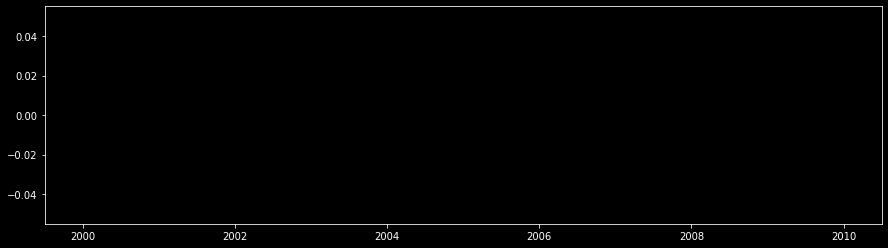

In [23]:
plt.subplots(figsize=(15,4))
sns.lineplot(data=df, x='date', y='price')

plt.subplots(figsize=(15,4))
data = df[((df['year'] == 2015) & (df['month'] <= 1))|((df['year'] == 2014) & (df['month'] >= 10))]
sns.lineplot(data=data, x='date', y='price')

[Text(0, 0.5, 'sales per month'),

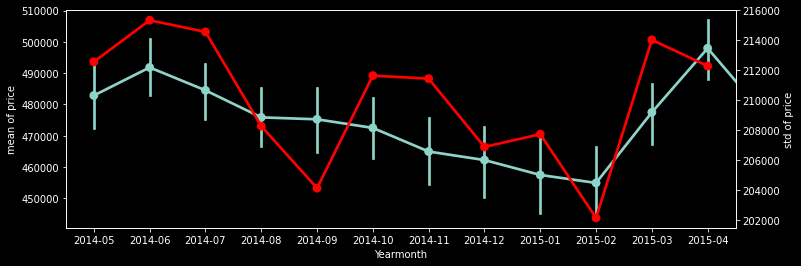

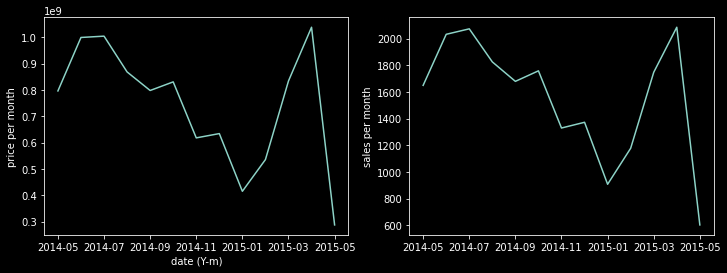

In [24]:
f, ax1 = plt.subplots(figsize=(12,4))
data = df.sort_values('Yearmonth')
g = sns.pointplot(data=data, x='Yearmonth', y='price')
g.set(ylabel='mean of price')

ax2 = ax1.twinx()
data = df.groupby(['Yearmonth']).std()
h = sns.pointplot(x=data.index[:-1], y=data.price[:-1],color='r', ax=ax2)
h.set(ylabel='std of price')
# sns.pointplot(data=df2, x='delta time (month)', y='price', ci='sd')

_, axs = plt.subplots(1,2, figsize=(12,4))
data = pd.DataFrame(df.groupby(['Yearmonth']).sum()['price'])
g = sns.lineplot(data=data, x=data.index, y= 'price',ax=axs[0])
g.set(ylabel='price per month', xlabel= 'date (Y-m)', xticks=np.sort(data.index[::2]))

data = df['Yearmonth'].value_counts().sort_index()
h =sns.lineplot(x=data.index, y=data.values,ax=axs[1])
h.set(ylabel='sales per month', xticks=np.sort(data.index[::2]))

In [ ]:
data_2015 = df[df['year'] == 2015]

f, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=df.sort_values('Yearmonth'), x='Yearmonth', y='price',ax=axs[0])
sns.boxplot(data=data_2015, x='month', y='price',ax=axs[1])
axs[0].set_xticks([0,2,4,6,8,10,12]) # <============= this is work only on boxplot?

data = df.groupby(['Yearmonth']).median()
f, axs = plt.subplots(figsize=(8,4))
sns.lineplot(data=data, x=data.index, y='price',ax=axs)
axs.set_ylabel('median of price')
axs.set_xticks(data.index[::2])

### Discussion

The charts above shows some statistical parameters of price over the months. The mean, median and the standard desviation of price over the months shows that February is the best month to buy houses due their lower value. Although this fact, the quantity of sales in this month is lower. Which opens the following questions:

 * What is the probability to buy a house with lower price in this month?
     * Q: The question above make sense?
     * A: Given the fact the present data is about homes solds, no. To this question and possible answer make more sense and utility of present investigation we need a dataset of sales order of these period. Due to the absence of these data, we need to assume that the company will always have enough quantity to sales order for its needs. Another assumption is the number of nomes solds is equal of the number of sales order and the company always be the custumer with seller's highest priority. This last assumption gives a approach more close to reality and the first one more straightforward.
     * PS A: If the choose the second assumption, the quantity of homes sold must be taken into account.

In [1]:
data_2015 = df[df['year'] == 2015]
sns.relplot(data=data_2015, x='day', y='price', kind='line', col='month', col_wrap=3)

NameError: name 'df' is not defined

### Number of houses sold over time

#### Week days

In [ ]:
# data = pd.DataFrame(df[df['year']==2015]['week day'].value_counts())
data = pd.DataFrame(df['week day'].value_counts())/df.shape[0]*100
plt.subplots(figsize=(10,4))
ax = sns.lineplot(x= data.index, y=data['week day'])
ax.set(ylabel='num of house solds along the week (%)',
       xlabel='week day')

In [ ]:
#create a pivot table which:
#     1. index is the week days
#     2. the columns are the month
#     3. the cell values are the value_counts of rows/records that have specific week day and month number.
a = pd.crosstab(data_2014['week day'],data_2014['month'], normalize='columns')
b = pd.crosstab(data_2015['week day'],data_2015['month'], normalize='columns')

f, axs = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
h.set(ylim=(0,0.27))

#transform the cells into columns and restructure the pivot table transform it as long-form data.
a = a.stack().reset_index(name='probability')
b = b.stack().reset_index(name='probability')

#the line below shows the mean and std. of probability between the month of 2014 along the week.
#The week day of number 0 is monday.
f, axs = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=a,x='week day', y='probability',ci='sd',ax=axs[0])
sns.lineplot(data=b,x='week day', y='probability',ci='sd',ax=axs[1])

#### Week of Month

In [ ]:
# data = pd.DataFrame(df[df['year']==2015]['week day'].value_counts())
data = pd.DataFrame(df['week of month'].value_counts())/df.shape[0]*100
plt.subplots(figsize=(10,4))
ax = sns.lineplot(x= data.index, y=data['week of month'])
ax.set(ylabel='num of house solds along the month(%)',
       xlabel='week number')

In [ ]:
#create a pivot table which:
#     1. index is the week days
#     2. the columns are the month
#     3. the cell values are the value_counts of rows/records that have specific week day and month number.
a = pd.crosstab(data_2014['week of month'],data_2014['month'], normalize='columns')
b = pd.crosstab(data_2015['week of month'],data_2015['month'], normalize='columns')

f, axs = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
h.set(ylim=(0,0.35))

#transform the cells into columns and restructure the pivot table transform it as long-form data.
a = a.stack().reset_index(name='probability')
b = b.stack().reset_index(name='probability')


#the line below shows the mean and std. of probability between the month of 2014 along the week.
#The week day of number 0 is monday.
f, axs = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=a,x='week of month', y='probability',ci='sd',ax=axs[0])
sns.lineplot(data=b,x='week of month', y='probability',ci='sd',ax=axs[1])

In [ ]:
data = df[(df['year']==2014) & (df['month']==12)]['week of month'].value_counts()
# sns.lineplot(data=data_2014, x='wekk of month'm y='')
_, axs = plt.subplots(1,2, figsize=(12,4))
g = sns.lineplot(x=data.index, y=data, ax= axs[0])
g.set(xlabel='week of month', ylabel='house solds', title='House solds in December of 2014')

data = df[(df['year']==2015) & (df['month']==5)]['week of month'].value_counts()
h = sns.lineplot(x=data.index, y=data, ax= axs[1])
h.set(xlabel='week of month', ylabel='house solds', title='House solds in May of 2015')

In [ ]:
data_2014b = df[(df['year']==2014) & (~df['month'].isin([11,12]))]
data_2015b = df[(df['year']==2015) & (df['month']!=5)]

#create a pivot table which:
#     1. index is the week days
#     2. the columns are the month
#     3. the cell values are the value_counts of rows/records that have specific week day and month number.
a = pd.crosstab(data_2014b['week of month'],data_2014b['month'], normalize='columns')
b = pd.crosstab(data_2015b['week of month'],data_2015b['month'], normalize='columns')

f, axs = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
h.set(ylim=(0,0.35))

#transform the cells into columns and restructure the pivot table transform it as long-form data.
data_2014b = a.stack().reset_index(name='probability')
data_2015b = b.stack().reset_index(name='probability')


#the line below shows the mean and std. of probability between the month of 2014 along the week.
#The week day of number 0 is monday.
f, axs = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=data_2014b,x='week of month', y='probability',ci='sd',ax=axs[0])
sns.lineplot(data=data_2015b,x='week of month', y='probability',ci='sd',ax=axs[1])

So the best week of month is the fourth week. Therefore, the best day to sell a home, assuming that the number of houses sold in a day is directly proportional to the probability to selling houses, is a Wednesday of fourth week of February of 2015.

In [ ]:
data = df[df['Yearmonth'] == '2015-02']['date'].value_counts().sort_index()
data2 = df[(df['Yearmonth'] == '2015-02') & (df['week of month'] == 4)]['date'].value_counts().sort_index()
data3 = df[(df['Yearmonth'] == '2015-02') & (df['week of month'] == 4) & (df['week day'] <= 2)]['date'].value_counts().sort_index()
g = sns.lineplot(x=data.index, y=data.values)
g.set(xticks=np.sort(data.index[::7]))
h = sns.lineplot(x=data2.index, y=data2.values, color='r')
h = sns.scatterplot(x=data3.index, y=data3.values,color='y')

### Price over year

#### Week days

[Text(0, 0.5, 'price of houses along the week'), Text(0.5, 0, 'week day')]

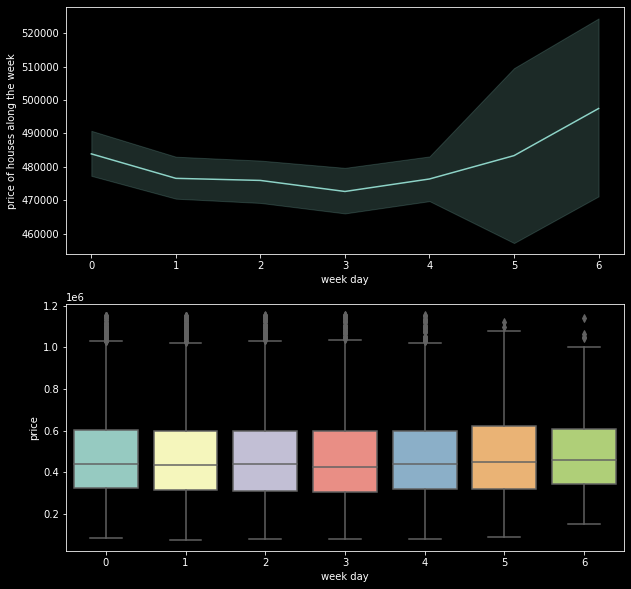

In [224]:
# data = pd.DataFrame(df['week day'])
f, axs = plt.subplots(2,1, figsize=(10,10))
sns.lineplot(x= df['week day'], y=df['price'], ax=axs[0])
axs[0].set(ylabel='price of houses along the week',
       xlabel='week day')
sns.boxplot(x= df['week day'], y=df['price'], ax=axs[1])
axs[0].set(ylabel='price of houses along the week',
       xlabel='week day')

<AxesSubplot:xlabel='week day', ylabel='mean price'>

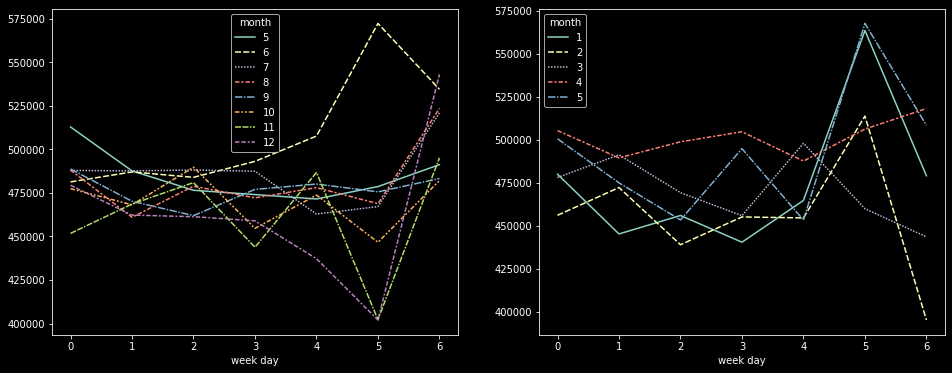

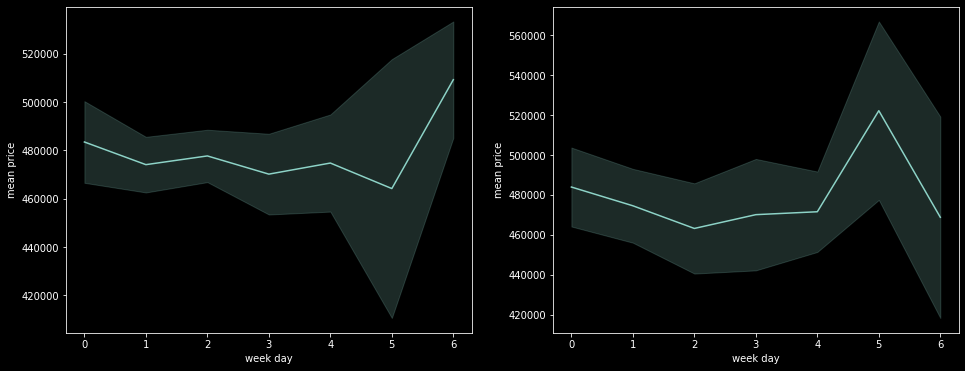

In [226]:
a = pd.pivot_table(data_2014, values='price', index='week day', columns='month', aggfunc='mean')
b = pd.pivot_table(data_2015, values='price', index='week day', columns='month', aggfunc='mean')

f, axs = plt.subplots(1,2, figsize=(16,6))
g = sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
# h.set(ylim=(0,0.27))

a = a.stack().reset_index(name='mean price')
b = b.stack().reset_index(name='mean price')

f, axs = plt.subplots(1,2,figsize=(16,6))
sns.lineplot(data=a,x='week day', y='mean price',ci='sd',ax=axs[0])
sns.lineplot(data=b,x='week day', y='mean price',ci='sd',ax=axs[1])

#### Week of Month

[Text(0, 0.5, 'prices of house along the month'), Text(0.5, 0, 'week number')]

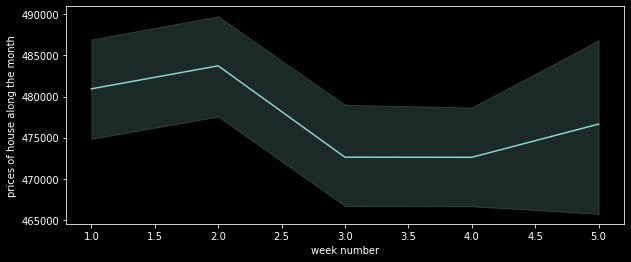

In [227]:
plt.subplots(figsize=(10,4))
ax = sns.lineplot(data=df, x= 'week of month', y='price')
ax.set(ylabel='prices of house along the month',
       xlabel='week number')

<AxesSubplot:xlabel='week of month', ylabel='mean price'>

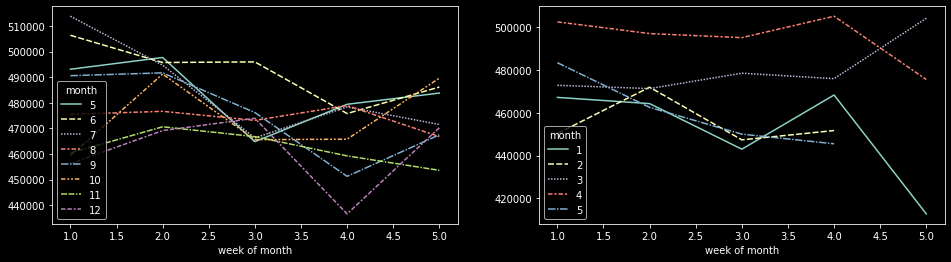

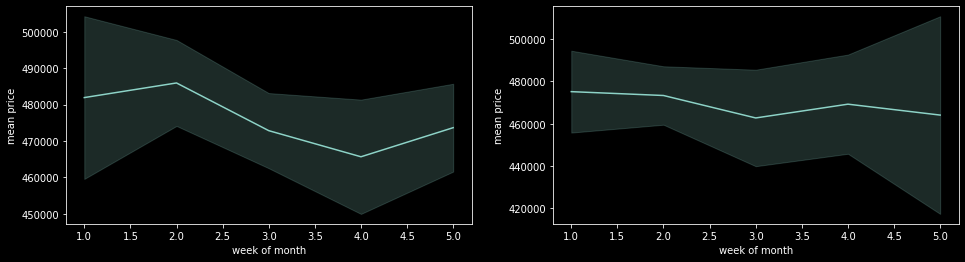

In [228]:
a = pd.pivot_table(data_2014, values='price', index='week of month', columns='month', aggfunc='mean')
b = pd.pivot_table(data_2015, values='price', index='week of month', columns='month', aggfunc='mean')

f, axs = plt.subplots(1,2, figsize=(16,4))
sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
# h.set(ylim=(,))

a = a.stack().reset_index(name='mean price')
b = b.stack().reset_index(name='mean price')

f, axs = plt.subplots(1,2,figsize=(16,4))
sns.lineplot(data=a,x='week of month', y='mean price',ci='sd',ax=axs[0])
sns.lineplot(data=b,x='week of month', y='mean price',ci='sd',ax=axs[1])

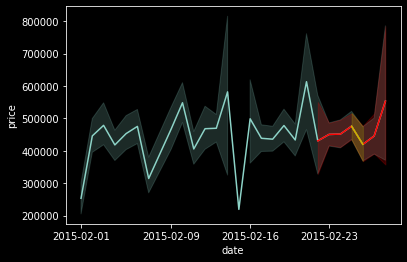

In [229]:
cond = df['Yearmonth'] == '2015-02'
cond2 = df['week of month'] == 4
cond3 = (df['week day'] <= 3) & (df['week day'] >= 2)
data = df[cond]
data2 = df[cond & cond2]
data3 = df[cond & cond2 & cond3]


g = sns.lineplot(data=data, x='date', y='price')
g.set(xticks=np.sort(data['date'].unique())[::7])
h = sns.lineplot(data=data2, x='date', y='price', color='r')
# h.set(xticks=np.sort(data2['date'].unique())[::2])

i = sns.lineplot(data=data3, x='date', y='price', color='y')
# h.set(xticks=np.sort(data3['date'].unique()))

#### Heatmap

<AxesSubplot:xlabel='week day', ylabel='week of month'>

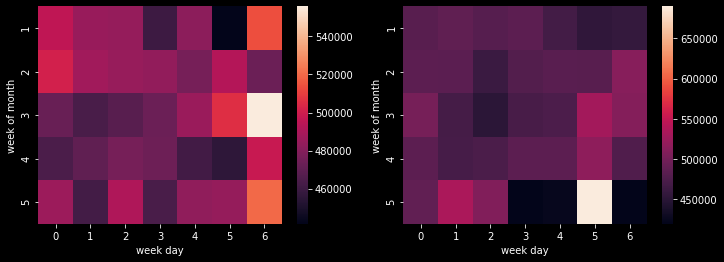

In [247]:
a = data_2014.pivot_table(index='week of month',columns='week day', values='price')
b = data_2015.pivot_table(index='week of month',columns='week day', values='price')
f, axs = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(a,ax=axs[0])
sns.heatmap(b,ax=axs[1])

<AxesSubplot:xlabel='week day', ylabel='week of month'>

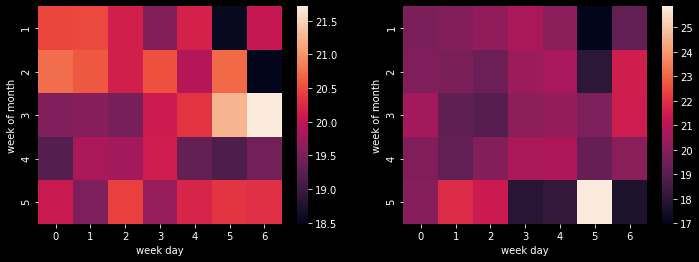

In [248]:
a = data_2014.pivot_table(index='week of month',columns='week day', values='price').apply(lambda x: x/x.sum()*100, axis=0)
b = data_2015.pivot_table(index='week of month',columns='week day', values='price').apply(lambda x: x/x.sum()*100, axis=0)
f, axs = plt.subplots(1,2, figsize=(12,4))
sns.heatmap(a,ax=axs[0])
sns.heatmap(b,ax=axs[1])

<AxesSubplot:xlabel='Yearmonth', ylabel='week of month'>

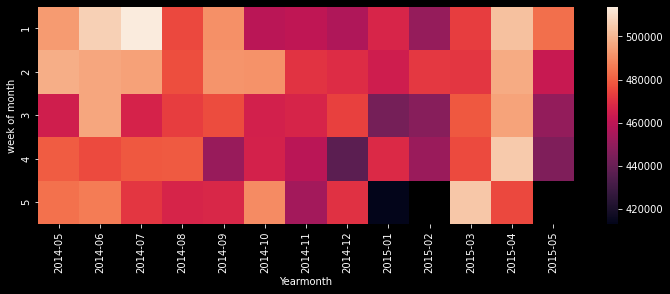

In [252]:
# a = df.pivot_table(index='week of month',columns='Yearmonth', values='price', aggfunc='mean').apply(lambda x: x/x.sum()*100, axis=0)
a = df.pivot_table(index='week of month',columns='Yearmonth', values='price', aggfunc='mean')
plt.subplots(figsize=(12,4))
sns.heatmap(a)

### Analysis of particular case

In [ ]:
data = df[df['date'].isin(pd.date_range("2014-11-01", periods=60, freq="D"))]

plt.subplots(figsize=(15,4))
sns.lineplot(data=data, x='date', y='price')

data_mean = data.groupby('year').mean()
data_std = data.groupby('year').std()
data_25q = data.groupby('year').quantile(.25)
data_75q = data.groupby('year').quantile(.75)
date_range = [data['date'].min(), data['date'].max()]
mean_price = np.array([data_mean['price'],data_mean['price']])
u_std_price = mean_price + np.array([data_std['price'], data_std['price']])
d_std_price = mean_price - np.array([data_std['price'], data_std['price']])
price_25q = [data_25q['price'], data_25q['price']]
price_75q = [data_75q['price'], data_75q['price']]
# sns.scatterplot(data=data, x='date', y='price')
plt.plot(date_range, mean_price, color='r')
# plt.plot(date_range, u_std_price, color='y')
# plt.plot(date_range, d_std_price, color='y')
plt.plot(date_range, price_25q, color='y')
plt.plot(date_range, price_75q, color='y')

In [ ]:
q75 = df[df['year'] == 2014]['price'].quantile(.75)
data2 = data[data['price'] >= q75]['price']
data2.describe()

In [ ]:
data[(data['month']==11) & (data['day'] > 25)].sort_values('date')
data2[(data2['month']==11) & (data2['week of month'] == 5)]

In [ ]:
data.groupby('year').std()

## Gross Sales

### per week day

[Text(0, 0.5, 'Gross sales')]

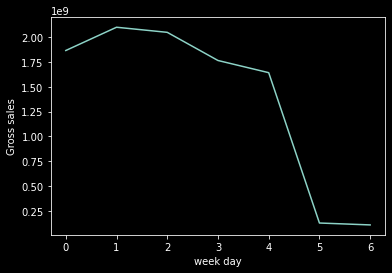

In [257]:
%%space gross_sales
# df['week day']
data = df.groupby('week day').sum()
g = sns.lineplot(x=data.index, y=data.price)
g.set(ylabel='Gross sales')

<AxesSubplot:xlabel='week day'>

<AxesSubplot:xlabel='week day'>

<AxesSubplot:xlabel='week day', ylabel='Gross Sales'>

<AxesSubplot:xlabel='week day', ylabel='Gross Sales'>

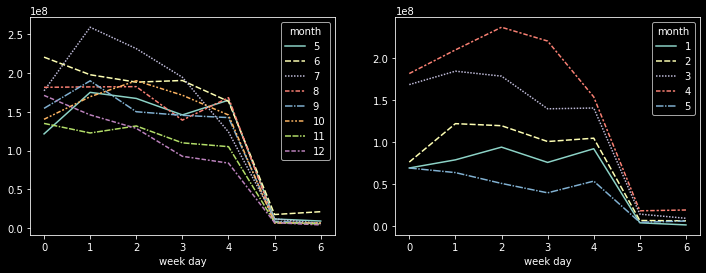

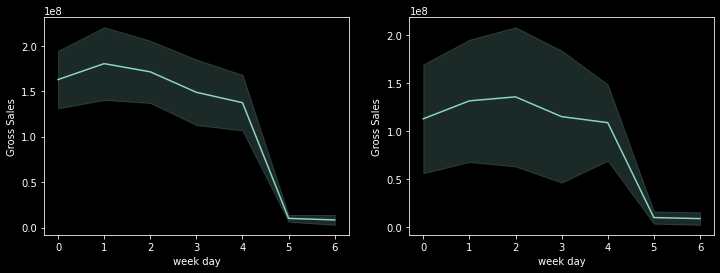

In [256]:
%%space gross_sales
a = pd.pivot_table(data_2014, values='price',index='week day',columns= 'month',
                   aggfunc='sum')
b = pd.pivot_table(data_2015, values='price',index='week day',columns= 'month',
                   aggfunc='sum')

f,axs = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=a, ax=axs[0])
sns.lineplot(data=b, ax=axs[1])

a = a.stack().reset_index(name='Gross Sales')
b = b.stack().reset_index(name='Gross Sales')

f,axs = plt.subplots(1,2,figsize=(12,4))
sns.lineplot(data=a, x='week day', y='Gross Sales', ax=axs[0], ci='sd')
sns.lineplot(data=b, x='week day', y='Gross Sales', ax=axs[1], ci='sd')

### per week of month

<AxesSubplot:xlabel='week of month'>

<AxesSubplot:xlabel='week of month', ylabel='mean price'>

<AxesSubplot:xlabel='week of month', ylabel='mean price'>

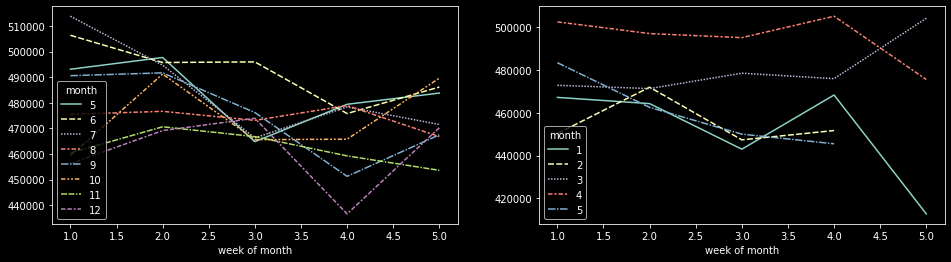

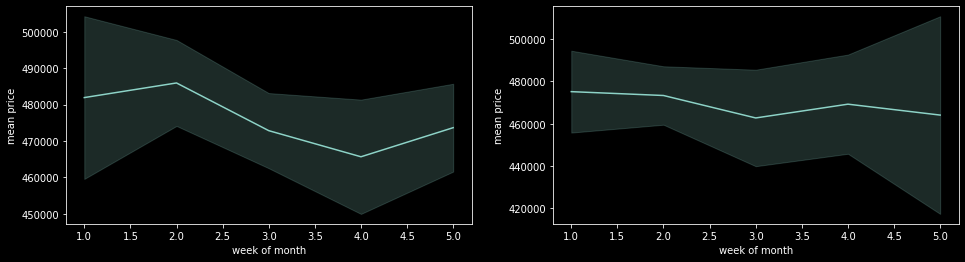

In [255]:
%%space gross_sales
a = pd.pivot_table(data_2014, values='price', index='week of month', columns='month', aggfunc='mean')
b = pd.pivot_table(data_2015, values='price', index='week of month', columns='month', aggfunc='mean')

f, axs = plt.subplots(1,2, figsize=(16,4))
sns.lineplot(data=a, ax=axs[0])
h = sns.lineplot(data=b, ax=axs[1])
# h.set(ylim=(,))

a = a.stack().reset_index(name='mean price')
b = b.stack().reset_index(name='mean price')

f, axs = plt.subplots(1,2,figsize=(16,4))
sns.lineplot(data=a,x='week of month', y='mean price',ci='sd',ax=axs[0])
sns.lineplot(data=b,x='week of month', y='mean price',ci='sd',ax=axs[1])

# Correlation: price + other fields

In [350]:
%%space correlation
corr = df.corr().sort_values('price', ascending=False, axis=0)
corr = corr.sort_values('price', ascending=False, axis=1)
# corr = corr.T.sort_values('price', ascending=False)

In [351]:
%%space correlation
df.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.637271
sqft_living      0.627756
sqft_living15    0.570055
sqft_above       0.535195
bathrooms        0.460306
lat              0.427475
bedrooms         0.304973
floors           0.273171
view             0.242011
sqft_basement    0.233806
sqft_lot         0.096413
sqft_lot15       0.084941
yr_renovated     0.083061
long             0.076709
yr_built         0.067594
waterfront       0.059126
condition        0.035501
year            -0.000709
week day        -0.007860
month           -0.010694
week of month   -0.016557
day             -0.016934
zipcode         -0.022464
Name: price, dtype: float64

In [352]:
%%space correlation
corr = corr[corr['price'] >= 0.3]
corr = corr.T[corr.T['price'] >= 0.3]
corr = corr.T

In [353]:
%%space correlation
corr

,price,grade,sqft_living,sqft_living15,sqft_above,bathrooms,lat,bedrooms
price,1.000000,0.637271,0.627756,0.570055,0.535195,0.460306,0.427475,0.304973
grade,0.637271,1.000000,0.716310,0.676456,0.718723,0.627061,0.087905,0.357753
sqft_living,0.627756,0.716310,1.000000,0.749549,0.856872,0.715013,0.011137,0.600602
sqft_living15,0.570055,0.676456,0.749549,1.000000,0.726734,0.542413,0.022073,0.411940
sqft_above,0.535195,0.718723,0.856872,0.726734,1.000000,0.638643,-0.043520,0.487831
bathrooms,0.460306,0.627061,0.715013,0.542413,0.638643,1.000000,-0.010349,0.498058
lat,0.427475,0.087905,0.011137,0.022073,-0.043520,-0.010349,1.000000,-0.042884
bedrooms,0.304973,0.357753,0.600602,0.411940,0.487831,0.498058,-0.042884,1.000000


(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

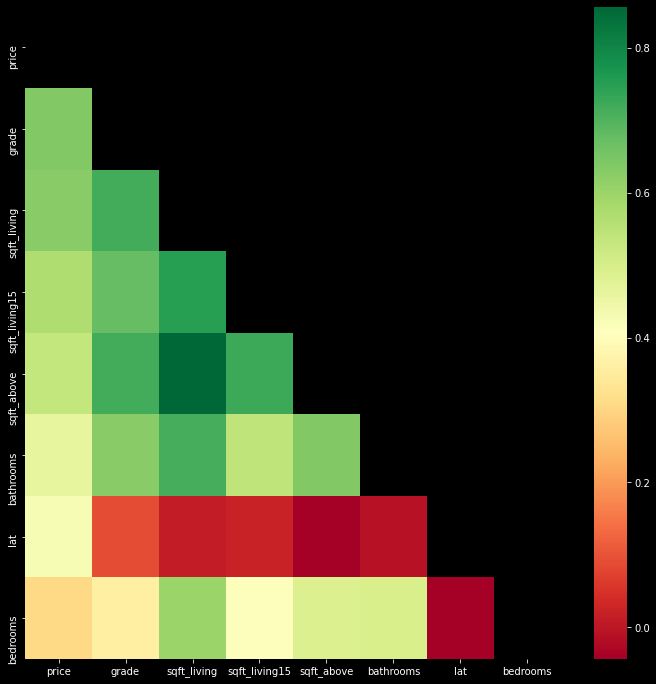

In [355]:
%%space correlation
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(12,12))
sns.heatmap(corr, mask=mask, cmap='RdYlGn')

In [327]:
%%space correlation
# df2 = df['price'].copy()
df[['price','date','grade','sqft_living','sqft_living15']]

,price,date
id,,
7129300520,221900.0,2014-10-13
6414100192,538000.0,2014-12-09
5631500400,180000.0,2015-02-25
2487200875,604000.0,2014-12-09
1954400510,510000.0,2015-02-18
...,...,...
263000018,360000.0,2014-05-21
6600060120,400000.0,2015-02-23
1523300141,402101.0,2014-06-23


# Price + date + bedrooms

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,day,month,year,Yearmonth,week day,week of month
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,13,10,2014,2014-10,0,2
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,9,12,2014,2014-12,1,2
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,25,2,2015,2015-02,2,4
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,9,12,2014,2014-12,1,2
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,18,2,2015,2015-02,2,3


In [10]:
x = data_2014[(data_2014['month'] == 6) & (data_2014['day'] > 15)]

In [ ]:
g = sns.relplot(data=x, x='date', y='price', col='bedrooms', kind='line',
            col_wrap=1)
g.fig.set_size_inches(14, 15)

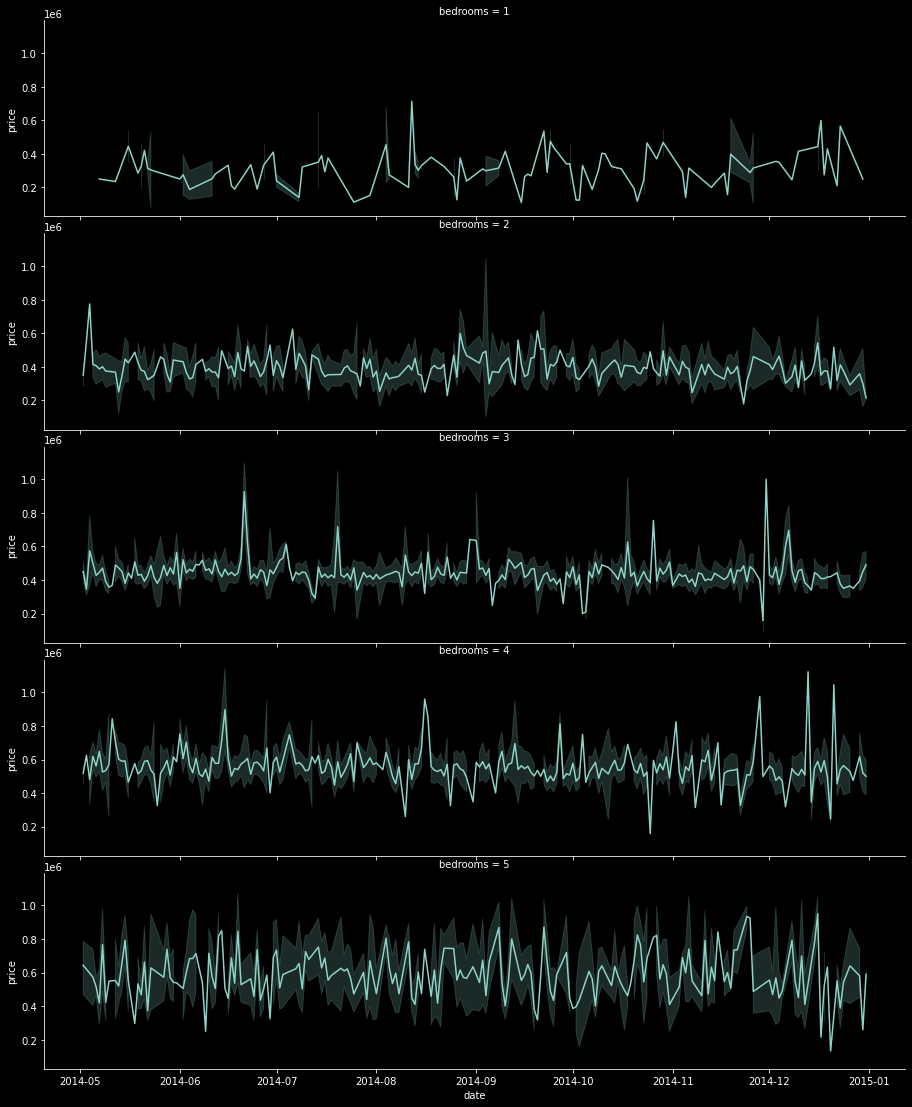

In [11]:
g = sns.relplot(data=data_2014, x='date', y='price', col='bedrooms', kind='line',
            col_wrap=1)
g.fig.set_size_inches(14, 15)

<AxesSubplot:xlabel='month', ylabel='price'>

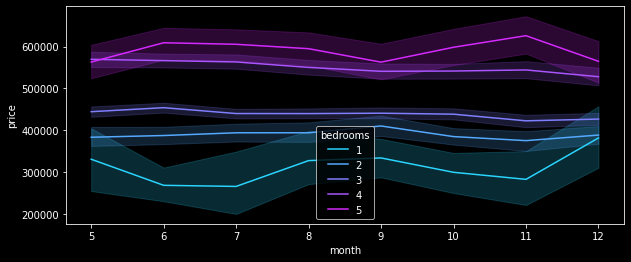

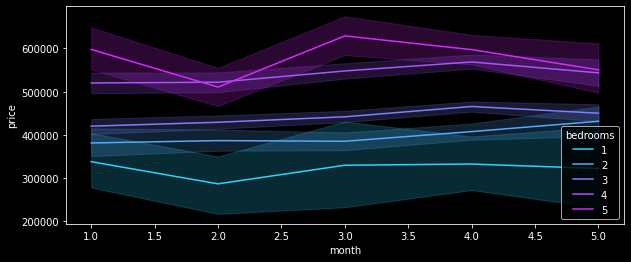

In [30]:
palette = sns.color_palette("cool", data_2014['bedrooms'].nunique())
plt.subplots(figsize=(10,4))
sns.lineplot(data=data_2014, x='month', y='price', hue='bedrooms',  palette=palette)

plt.subplots(figsize=(10,4))
sns.lineplot(data=data_2015, x='month', y='price', hue='bedrooms',  palette=palette)

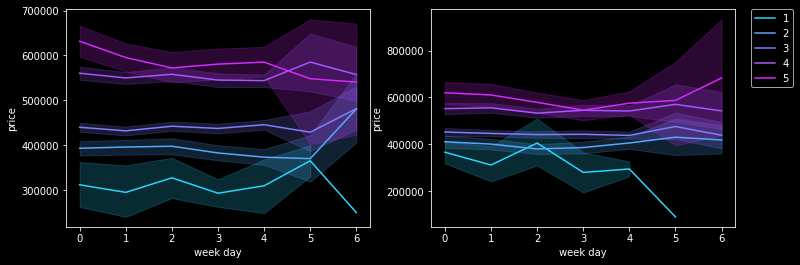

In [45]:
f, axs = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=data_2014, x='week day', y='price',
             hue='bedrooms', palette=palette, ax=axs[0])
axs[0].legend('',frameon=False)

sns.lineplot(data=data_2015, x='week day', y='price',
             hue='bedrooms', palette=palette, ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

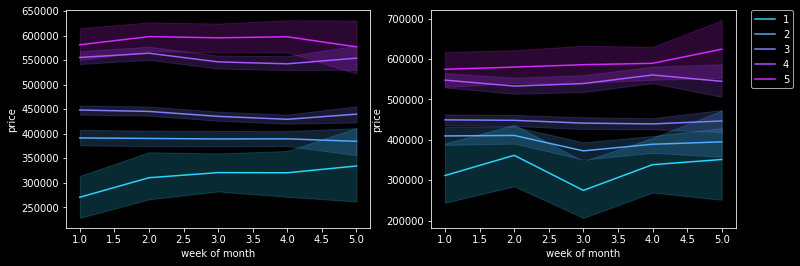

In [47]:
f, axs = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=data_2014, x='week of month', y='price',
             hue='bedrooms', palette=palette, ax=axs[0])
axs[0].get_legend().remove()
# axs[0].legend('',frameon=False)

sns.lineplot(data=data_2015, x='week of month', y='price',
             hue='bedrooms', palette=palette, ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

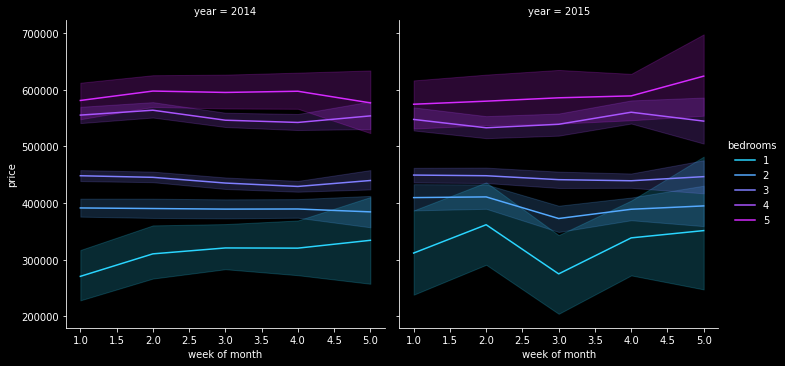

In [49]:
sns.relplot(kind='line', data=df, x='week of month', y='price', col='year',
             hue='bedrooms', palette=palette)

In [63]:
cond1 = data_2014['week of month'] == data_2014['week of month'].min()
cond2 = data_2014['bedrooms'] == 1
data_2014[cond1 & cond2]['price'].mean()

270610.71428571426

<AxesSubplot:xlabel='week of month'>

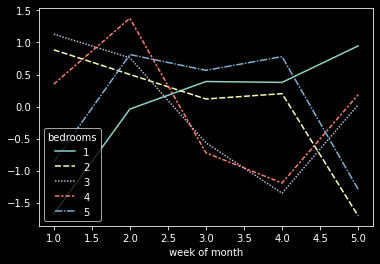

In [72]:
a = pd.pivot_table(data_2014, values='price', index='week of month', columns='bedrooms').apply(lambda x: (x-x.mean())/x.std(), axis=0)
sns.lineplot(data=a)

[None, None]

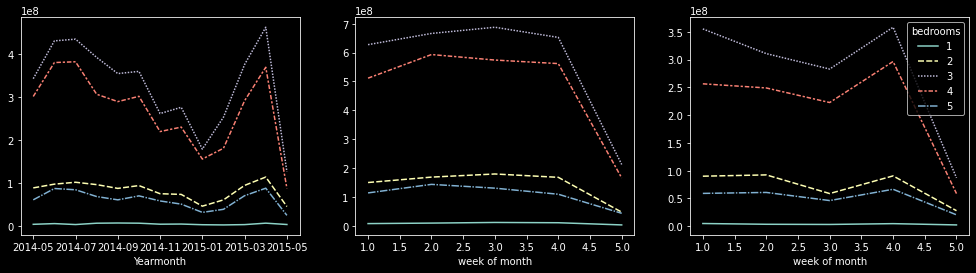

In [98]:
a = pd.pivot_table(df, values='price', index='Yearmonth', columns='bedrooms', aggfunc='sum')
b = pd.pivot_table(data_2014, values='price', index='week of month', columns='bedrooms', aggfunc='sum')
c = pd.pivot_table(data_2015, values='price', index='week of month', columns='bedrooms', aggfunc='sum')

f, axs = plt. subplots(1,3, figsize=(17,4))
g = sns.lineplot(data=a, ax=axs[0])
g.set(xticks=a.index[::2])
sns.lineplot(data=b, ax=axs[1])
sns.lineplot(data=c, ax=axs[2])
[ax.get_legend().remove() for ax in axs[:-1]]

<AxesSubplot:xlabel='week day'>

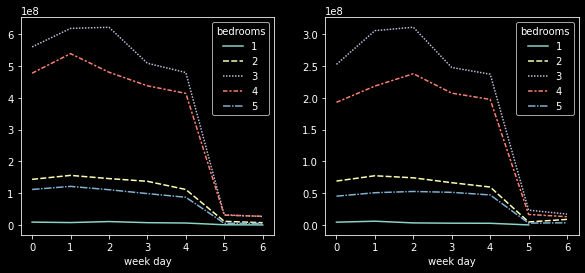

In [99]:
d = pd.pivot_table(data_2014, values='price', index='week day', columns='bedrooms', aggfunc='sum')
e = pd.pivot_table(data_2015, values='price', index='week day', columns='bedrooms', aggfunc='sum')

f, axs = plt. subplots(1,2, figsize=(10,4))
sns.lineplot(data=d, ax=axs[0])
sns.lineplot(data=e, ax=axs[1])

# price + date + bathrooms

In [105]:
%%space bathrooms
df['bathrooms'].nunique()

22

In [101]:
%%space bathrooms
df['bathrooms'].value_counts()

2.50    5180
1.00    3842
1.75    3003
2.25    1949
2.00    1885
1.50    1428
2.75    1079
3.00     619
3.50     538
3.25     424
3.75      74
0.75      71
4.00      63
4.50      32
4.25      27
1.25       7
4.75       4
0.50       4
5.00       3
6.00       1
5.25       1
5.50       1
Name: bathrooms, dtype: int64

(<Figure size 864x288 with 1 Axes>, <AxesSubplot:>)

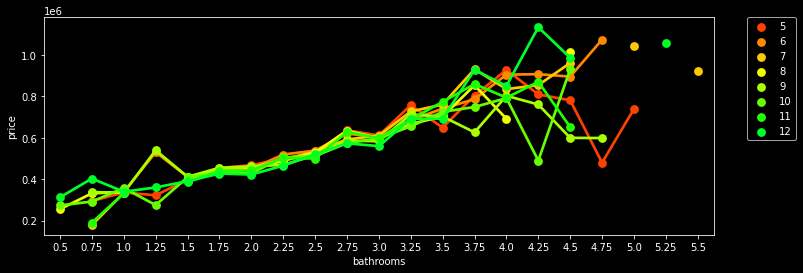

In [268]:
%%space bathrooms
palette = sns.color_palette("hsv", data_2014['bathrooms'].nunique())
plt.subplots(figsize=(12,4))
g = sns.pointplot(data=data_2014, x='bathrooms', y='price', hue='month',
                  estimator=np.mean, ci=None, palette=palette)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.clim(5,12)
# g.fig.set_size_inches(14, 15)

(<Figure size 864x288 with 1 Axes>, <AxesSubplot:>)

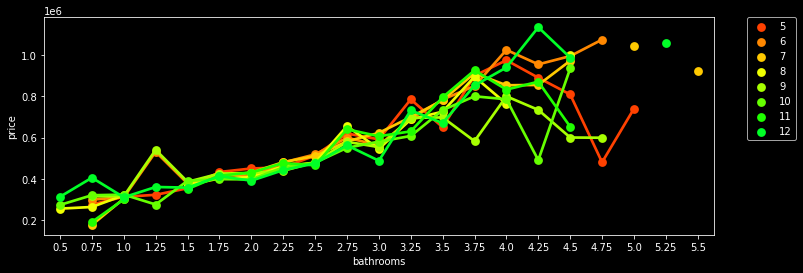

In [269]:
%%space bathrooms
plt.subplots(figsize=(12,4))
g = sns.pointplot(data=data_2014, x='bathrooms', y='price', hue='month',
                  estimator= np.median, ci=None, palette=palette)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(<Figure size 864x288 with 1 Axes>, <AxesSubplot:>)

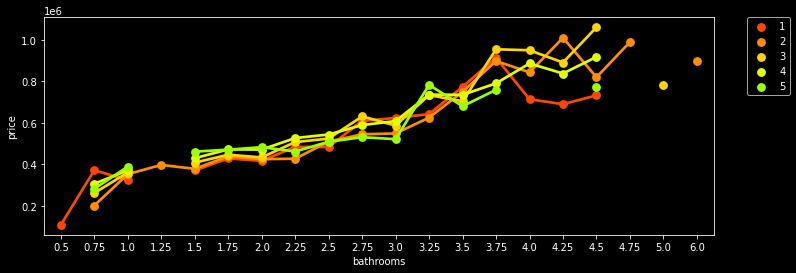

In [270]:
%%space bathrooms
palette = sns.color_palette("hsv", data_2015['bathrooms'].nunique())
plt.subplots(figsize=(12,4))
g = sns.pointplot(data=data_2015, x='bathrooms', y='price', hue='month',
                  ci=None, palette=palette)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

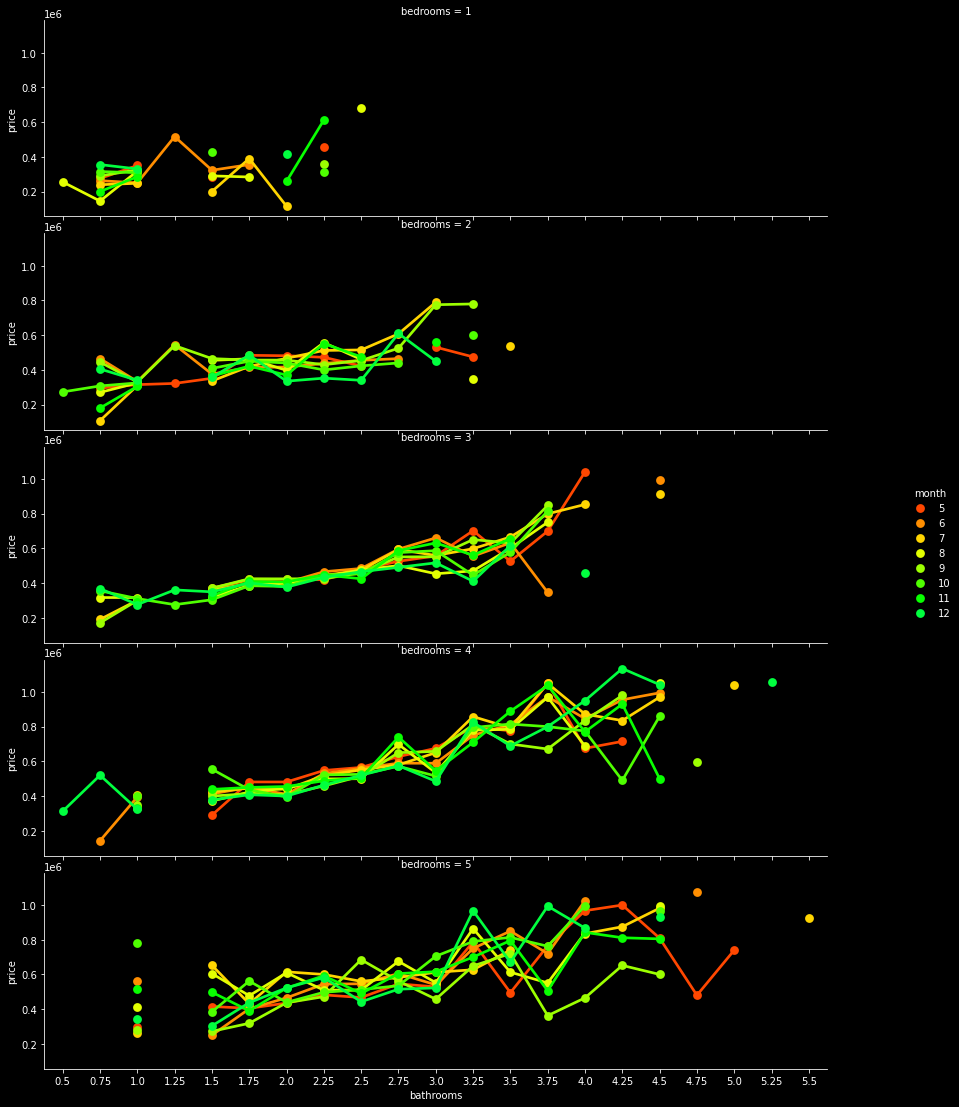

In [271]:
%%space bathrooms
# plt.subplots(figsize=(12,4))
g = sns.catplot(kind='point', data=data_2014, x='bathrooms', y='price', hue='month',
                estimator= np.median, ci=None,
                col='bedrooms',
                palette=palette, col_wrap=1)
g.fig.set_size_inches(14, 15)

## bathrooms and bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

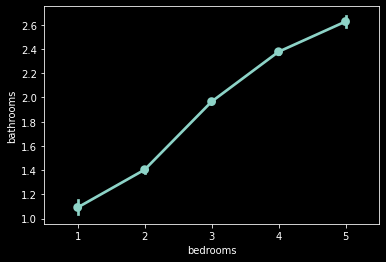

In [272]:
%%space bathrooms
sns.pointplot(data=data_2014, y='bathrooms', x='bedrooms')

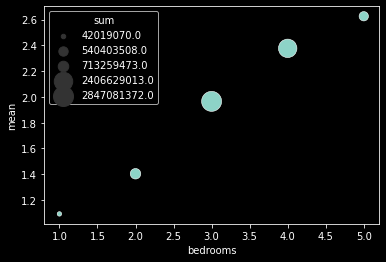

In [273]:
%%space bathrooms
a = data_2014.groupby('bedrooms').agg(['mean','sum'])
# a['price'] = a['price'].style.format("{:.4e}")
g =sns.scatterplot(x=a.index, y=a['bathrooms']['mean'], size=a['price']['sum'], sizes=(20,400))

## <font size="5">Heatmap</font>

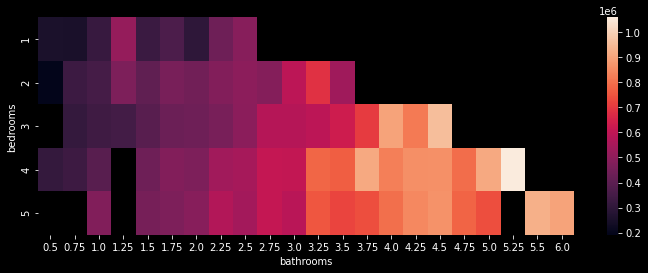

In [280]:
%%space bathrooms
def foo(df):
   pivot_data = df.pivot_table(values='price', index='bedrooms', columns='bathrooms', aggfunc='mean')
   plt.subplots(figsize=(12,4))
   sns.heatmap(pivot_data)
foo(df)

In [298]:
%%space bathrooms
def foo(df,title='test'):
 pivot_data = df.pivot_table(values='price', index='bedrooms', columns='bathrooms', aggfunc='sum')
 f, ax = plt.subplots(figsize=(12,4))
 sns.heatmap(pivot_data)
 ax.set(title=title)

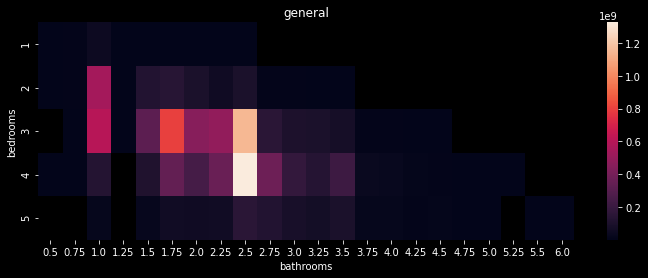

In [299]:
%%space bathrooms
foo(df,title='general')

In [301]:
df.shape

(20235, 26)

# Draft

In [ ]:
data_2014.groupby(['bedrooms','bathrooms']).size()

In [ ]:
#  min(myList, key=lambda x:abs(x-myNumber))
# %.2E' % Decimal('40800000000.00000000000000')